<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Исследование структуры данных

1. Файл с данными можно найти [здесь](https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view?usp=drive_link). Его требуется положить в папку data. Далее читаем данные с помощью библиотеки Pandas.

In [2]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выводим несколько первых строк таблицы, чтобы убедиться в том, что наши данные не повреждены. Знакомимся с признаками и их структурой.

In [3]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выводим основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обращаем внимание на информацию о числе непустых значений.

In [5]:
hh_data.columns[hh_data.isna().any()]

Index(['Опыт работы', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность'],
      dtype='object')

5. Выводим основную статистическую информацию о столбцах.


In [6]:
hh_data.describe(include='object')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создаем с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполним преобразование и удалим признак **"Образование и ВУЗ** из таблицы.


In [7]:
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(
    lambda x: ' '.join(
        word
        for word in x.split()[:2]
        if word != 'образование'
    )
)
hh_data.drop(columns='Образование и ВУЗ', inplace=True)
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создаем два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполним преобразование и удалим признак **"Пол, возраст"** из таблицы.


In [8]:
hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(
    lambda x: pd.Series([
        x.replace(' ', '').split(',')[0][0],
        int(x.replace(' ', '').split(',')[1][:2])
    ])
)
hh_data.drop(columns='Пол, возраст', inplace=True)
hh_data.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
 
В результате преобразования у нас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

Выполним преобразование и удалим признак **"Опыт работы"** из таблицы.

In [9]:
def experience_to_months(text):
    if pd.isna(text):              # явный пропуск
        return np.nan

    # Разделяем строку, приводим к нижнему регистру и берем только первые 6 слов
    tokens = text.lower().split()[:6]

    # ключевые слова для перевода годы / месяцы
    yr_words = {'год', 'года', 'лет', 'г'}
    mo_words = {'месяц', 'месяца', 'месяцев', 'мес'}

    # проверяем, есть ли пара «цифра + ключевое слово» в этих 6 словах
    has_pattern = any(
        tokens[i-1].isdigit() and tokens[i] in yr_words | mo_words
        for i in range(1, len(tokens))
    )
    if not has_pattern:
        return np.nan          # скрытые пропуски "Не указано" переводим в NaN

    # извлекаем годы / месяцы 
    years = months = 0
    for i in range(1, len(tokens)):
        if tokens[i-1].isdigit():
            w = tokens[i]
            if w in yr_words:
                years = int(tokens[i-1])
            elif w in mo_words:
                months = int(tokens[i-1])

    return years * 12 + months if (years or months) else np.nan

# Выполним преобразование и удалим признак
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(experience_to_months).astype('Int64')
hh_data.drop(columns='Опыт работы', inplace=True)
hh_data.head()

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67


4. Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник", остальные обозначим как "другие".


    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполним преобразования и удалим признак **"Город, переезд, командировки"** из таблицы.


In [10]:
# Список городов-миллионников
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск',
    'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
    'Воронеж', 'Волгоград'
]

# Функция подготовки данных для признака "Город"
def extract_city(text):
    parts = text.split(',')
    if parts:
        city = parts[0].strip()
        if city in ['Москва', 'Санкт-Петербург']:
            return city
        elif city in million_cities:
            return 'город-миллионник'
        else:
            return 'другие'

# Функция подготовки данных для признака "Готовность к переезду"
def extract_relocation(text):
    lower_text = text.lower()
    
    negative_patterns = [
        'не готов к переезду',
        'не готова к переезду',
        'не хочу переезжать',
        'не рассматриваю переезд',
        'не интересует переезд',
        'переезд не рассматриваю',
        'не планирую переезд',
        'не рассматриваю возможность переезда',
        'не рассматриваю переезд в другие города'
    ]
    
    for pattern in negative_patterns:
        if pattern in lower_text:
            return False

    positive_patterns = [
        'готов к переезду',
        'готова к переезду',
        'хочу переехать',
    ]
    
    for pattern in positive_patterns:
        if pattern in lower_text:
            return True
        
    # Если не указано, то не готов
    return False

# Функция подготовки данных для признака "Готовность к командировкам"
def extract_travel(text):
    lower_text = text.lower()
    
    negative_patterns = [
        'не готов к командировкам',
        'не готова к командировкам',
        'не готов к частым командировкам',
        'не готов к редким командировкам',
        'не готов к командировкам вообще',
        'не рассматриваю командировки',
        'не интересуюсь командировками'
    ]
    
    for pattern in negative_patterns:
        if pattern in lower_text:
            return False

    positive_patterns = [
        'готов к командировкам',
        'готова к командировкам',
        'готов к редким командировкам',
        'готова к редким командировкам',
        'готов к частым командировкам',
        'готова к частым командировкам',
    ]
    
    for pattern in positive_patterns:
        if pattern in lower_text:
            return True

    # Если не указано, то не готов
    return False


# Создадим новые признаки с применением наших функций
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(extract_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(extract_relocation)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(extract_travel)

# Удаляем исходный столбец
hh_data.drop(columns=['Город, переезд, командировки'], inplace=True)
hh_data.head()

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67,Москва,False,True


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполним данное преобразование для признаков "Занятость" и "График" после чего удалим их из таблицы

In [11]:
# Возможные категории
employment_options = ["полная занятость", "частичная занятость", "проектная работа", "волонтерство", "стажировка"]
schedule_options = ["полный день", "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]

# Признаки-мигалки: ЗАНЯТОСТЬ
for option in employment_options:
    hh_data[option] = hh_data['Занятость'].apply(lambda x: option in x)

# Признаки-мигалки: ГРАФИК
for option in schedule_options:
    hh_data[option] = hh_data['График'].apply(lambda x: option in x)

# Удаляем исходные столбцы
hh_data.drop(columns=['Занятость', 'График'], inplace=True)
hh_data.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225,...,True,True,True,False,False,False,False,True,True,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67,...,True,False,False,False,False,True,False,False,False,False


6. Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Файл ExchangeRates.csv находится в папке data

Создаем новый DataFrame из файла: data/ExchangeRates.csv. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).

Перед нами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуемся этой информацией в наших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Дата, по которой определяется курс, находится в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После преобразования удалим исходный столбец заработной платы "ЗП" и все промежуточные столбцы.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты. Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".

In [13]:
# Загрузка и подготовка данных курсов
currency_data = (
    pd.read_csv('data/ExchangeRates.csv', usecols=['date', 'currency', 'close', 'proportion'])
    .assign(date=lambda df: pd.to_datetime(df['date'], format='%d/%m/%y'))
)

# Преобразование даты обновления резюме и распаковка зарплаты
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.normalize()
hh_data[['ЗП_сумма', 'Валюта']] = hh_data['ЗП'].str.replace('.', '', regex=False).str.split(' ', expand=True)
hh_data['ЗП_сумма'] = hh_data['ЗП_сумма'].astype('int64')

# Сопоставление валют с кодами
dict_curr = {
    'грн': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'белруб': 'BYN', 'KGS': 'KGS',
    'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT', 'руб': 'RUB'
}
hh_data['Валюта'] = hh_data['Валюта'].map(dict_curr)

# Объединение с курсами валют
hh_data = hh_data.merge(
    currency_data,
    how='left',
    left_on=['Обновление резюме', 'Валюта'],
    right_on=['date', 'currency']
)

# Для рублей — курсы единичны
hh_data.loc[hh_data['Валюта'] == 'RUB', ['close', 'proportion']] = 1

# Расчет зарплаты в рублях
hh_data['ЗП (руб)'] = hh_data['ЗП_сумма'] * hh_data['close'] / hh_data['proportion']

# Убираем временные столбцы
hh_data.drop(columns=['ЗП', 'date', 'currency', 'ЗП_сумма', 'Валюта', 'close', 'proportion'], inplace=True)
hh_data.head()


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,233,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее,М,38,225,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее,Ж,26,67,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


# Исследование зависимостей в данных

1. Построим распределение признака **"Возраст"**.

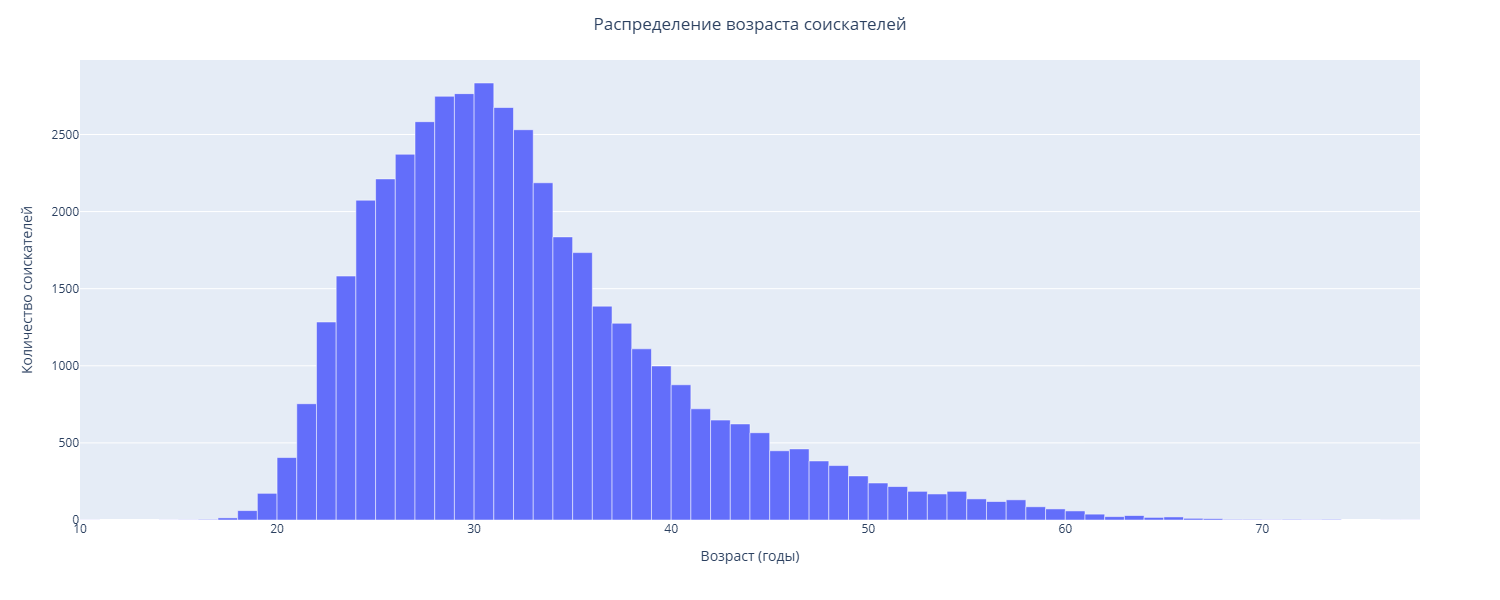

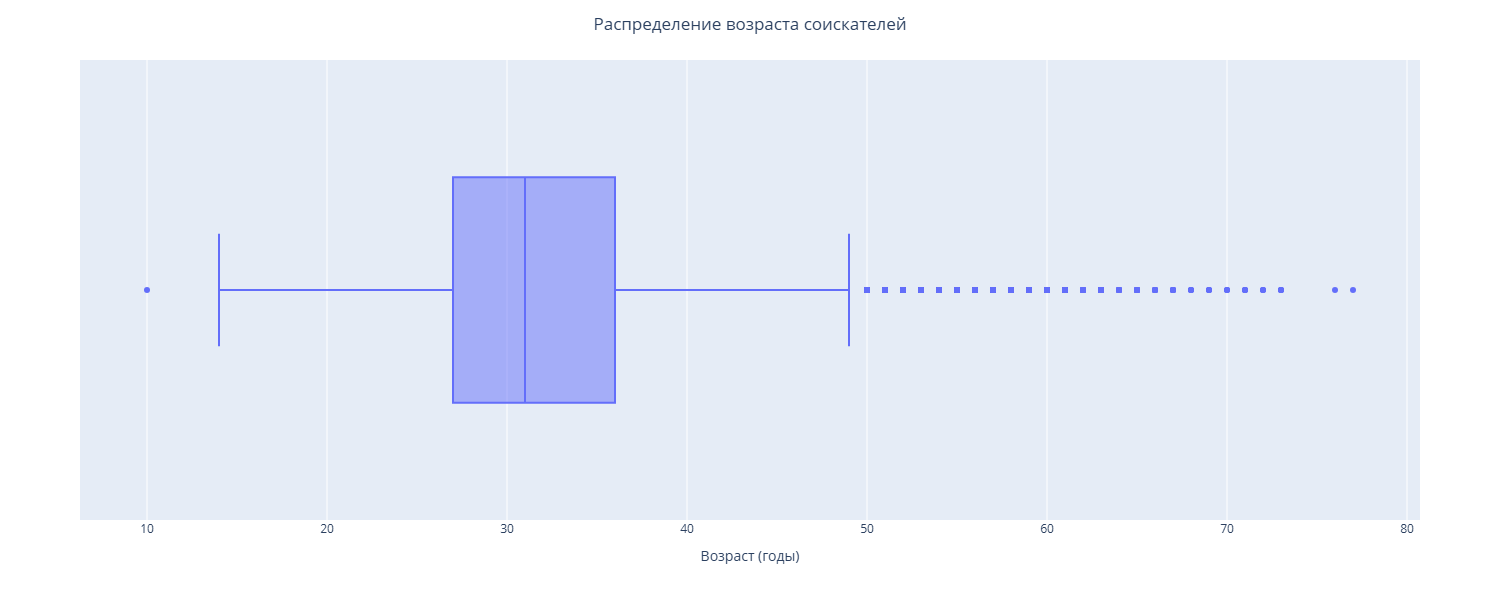

Мода: 30
Минимум: 10
Максимум: 77
Медиана: 31.0
25-й перцентиль: 27.0
75-й перцентиль: 36.0


In [14]:
# Гистограмма
fig_hist = px.histogram(
    hh_data,
    x='Возраст',
)

# Задаём границы корзин
fig_hist.update_traces(
    xbins=dict(
        start=hh_data['Возраст'].min(),     
        end=hh_data['Возраст'].max() + 1,   
        size=1                              
    ),
    marker_line_width=0.5,                   
    marker_line_color="white"                
)

# Обновляем layout с подписями осей
fig_hist.update_layout(
    title='Распределение возраста соискателей',
    title_x=0.5,
    width=1500,   
    height=600,
    xaxis_title='Возраст (годы)',
    yaxis_title='Количество соискателей'
)

fig_hist.write_html("docs/1_age_hist.html")
fig_hist.show('png')

# Boxplot
fig_box = px.box(
    hh_data,
    x='Возраст',
)
fig_box.update_layout(
    title='Распределение возраста соискателей',
    xaxis_title='Возраст (годы)',
    title_x=0.5,
    width=1500,   
    height=600
)

fig_box.write_html("docs/1_age_box.html")
fig_box.show('png')

# Основные статистические данные распределения
print("Мода:", hh_data['Возраст'].mode().values[0])
print("Минимум:", hh_data['Возраст'].min())
print("Максимум:", hh_data['Возраст'].max())
print("Медиана:", hh_data['Возраст'].median())
print("25-й перцентиль:", hh_data['Возраст'].quantile(0.25))
print("75-й перцентиль:", hh_data['Возраст'].quantile(0.75))

> Вывод:
> - Самый частый возраст (мода): 30 лет
>   - возможно, это вызвано тем, что после окончания ВУЗа/училища люди склонны идти работать по распределению, на кафедру и т.д.; в более старшем же возрасте у работников уже, вероятно, наработаны связи, поэтому HeadHunter им необходимости пользоваться нет. А в 30 очень часто люди хотят сменить работу или вообще род деятельности, но достаточного опыта и востребованности пока ещё не имеют, поэтому пользуются такими сервисами для поиска работы.
> - Медиана: 31 год
> - Предельные значения признака: от 10 до 77 лет
> - Интервал большинства (Q1-Q3): от 27 до 36 лет
> - IQR (межквартильный размах): 9 лет
>  - Аномалии: 
>    - 10-14 лет - ошибка ввода, исключить
>    - 15–17 лет - возможно ученики, с этого возраста можно работать 
>    - 18–65 лет - нормальное распределение
>    - старше 65 лет - крайние значения, возможно не ошибка, но редкость


2. Построим распределение признака **"Опыт работы (месяц)"**.

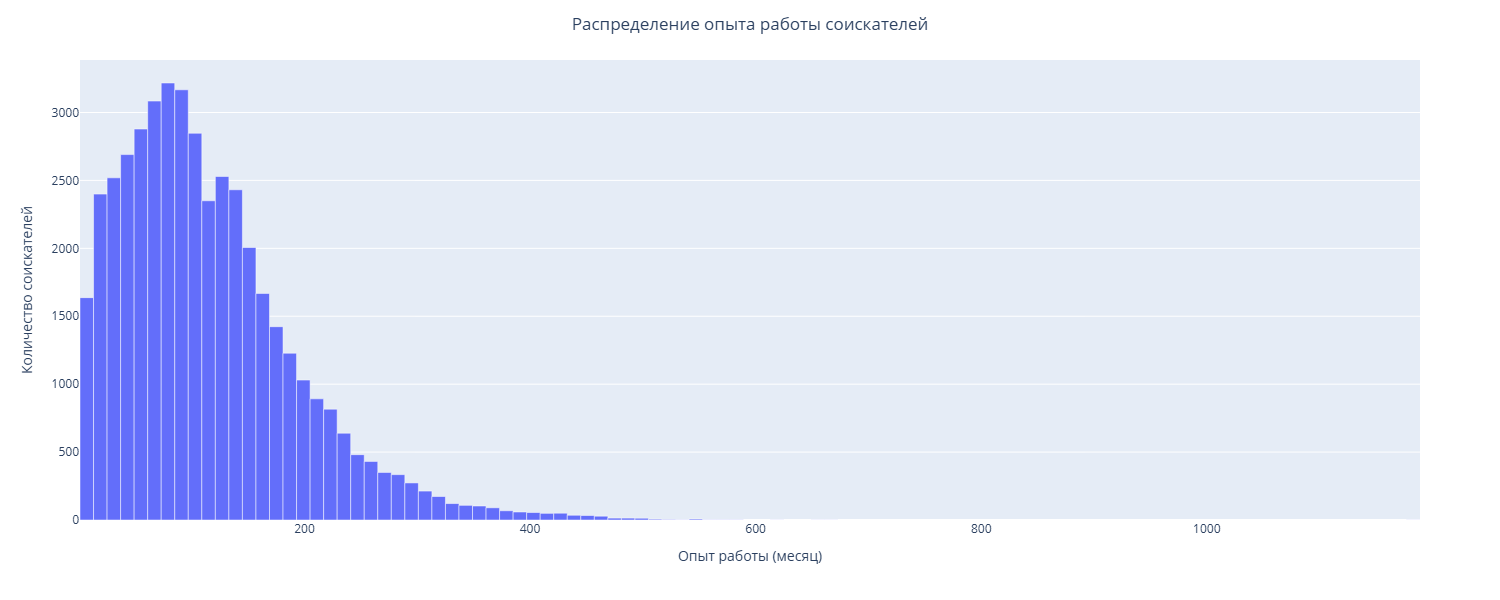

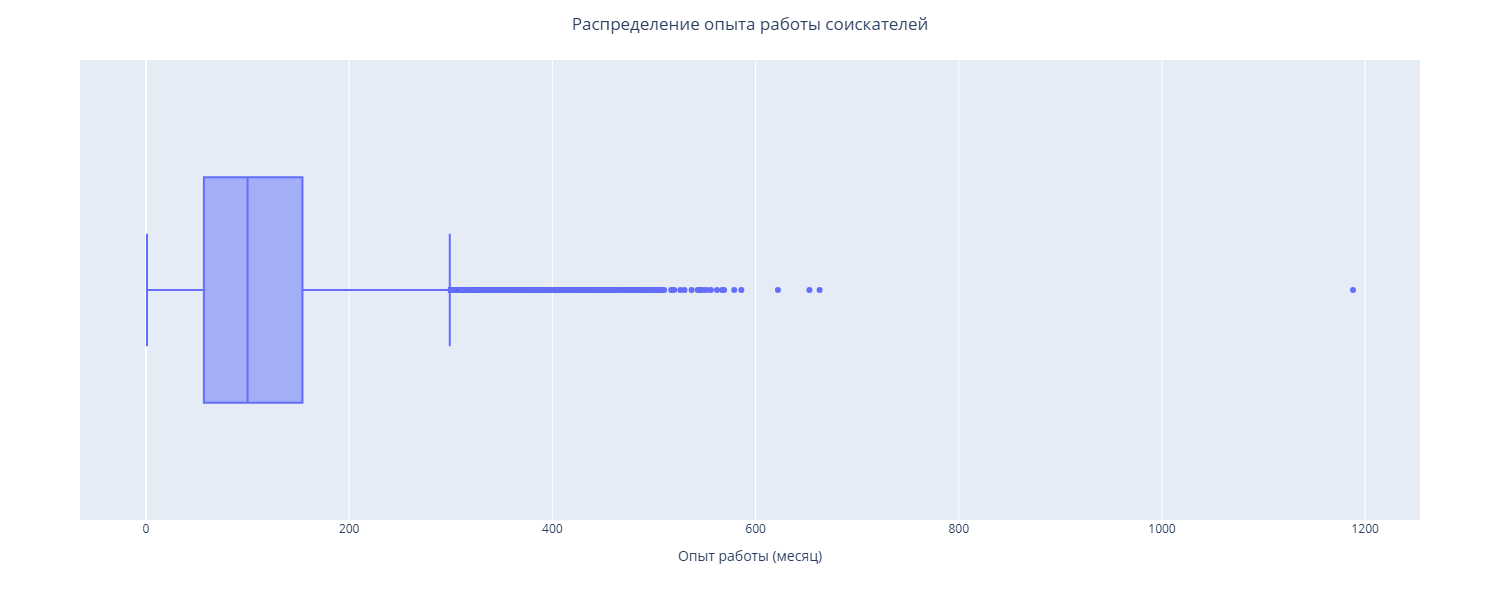

Мода: 81
Минимум: 1
Максимум: 1188
Медиана: 100.0
25-й перцентиль: 57
75-й перцентиль: 154


In [15]:
# Гистограмма
fig_hist = px.histogram(
    hh_data,
    x='Опыт работы (месяц)',
)
# Задаём границы корзин
fig_hist.update_traces(
    xbins=dict(
        start=hh_data['Опыт работы (месяц)'].min(),     
        end=hh_data['Опыт работы (месяц)'].max() + 1,   
        size=12                              
    ),
    marker_line_width=0.5,                   
    marker_line_color="white"              
)
fig_hist.update_layout(
    title='Распределение опыта работы соискателей',
    yaxis_title='Количество соискателей',
    title_x=0.5,
    width=1500,   
    height=600 
)
fig_hist.write_html("docs/2_experience_hist.html")
fig_hist.show('png')

# Boxplot
fig_box = px.box(
    hh_data,
    x='Опыт работы (месяц)',
)
fig_box.update_layout(
    title='Распределение опыта работы соискателей',
    title_x=0.5,
    width=1500,   
    height=600
)
fig_box.write_html("docs/2_experience_box.html")
fig_box.show('png')

# Основные статистические данные распределения
print("Мода:", hh_data['Опыт работы (месяц)'].mode().values[0])
print("Минимум:", hh_data['Опыт работы (месяц)'].min())
print("Максимум:", hh_data['Опыт работы (месяц)'].max())
print("Медиана:", hh_data['Опыт работы (месяц)'].median())
print("25-й перцентиль:", hh_data['Опыт работы (месяц)'].quantile(0.25))
print("75-й перцентиль:", hh_data['Опыт работы (месяц)'].quantile(0.75))

> Вывод:
> - Мода: 81 месяц 
>   - это наиболее частое значение
>   - это примерно 7 лет, если вычесть из моды предыдущего графика "Возраст" это число: 30-7=23 - получим примерный возраст окончания ВУЗа. Можно также отметить высокую корреляцию возраста с признаком опыта.
> - Предельные значения признака: от 1 до 1188 месяцев
> - Медиана: 100 месяцев
>    - это значение делит выборку пополам
> - Интервал большинства (Q1-Q3): от 57 до 154 месяцев
>    - чаще всего соискатели имеют опыт в интервале примерно от 5 до 13 лет. Это подтверждает типичный уровень стажа зрелых специалистов. 
> - IQR (межквартильный размах): 97 месяцев
>    - это интервал, в котором находится средние 50% всех наблюдений
> - Аномалии:
>    - 1188 месяцев (99 лет) - почти наверняка ошибка, так как трудовая активность редко длится так долго
>    - по правилу Тьюки все, что выше верхней границы 300 месяцев (~25лет) можно считать выбросами и, возможно, стоит очистить

3. Построим распределение признака **"ЗП (руб)"**. 


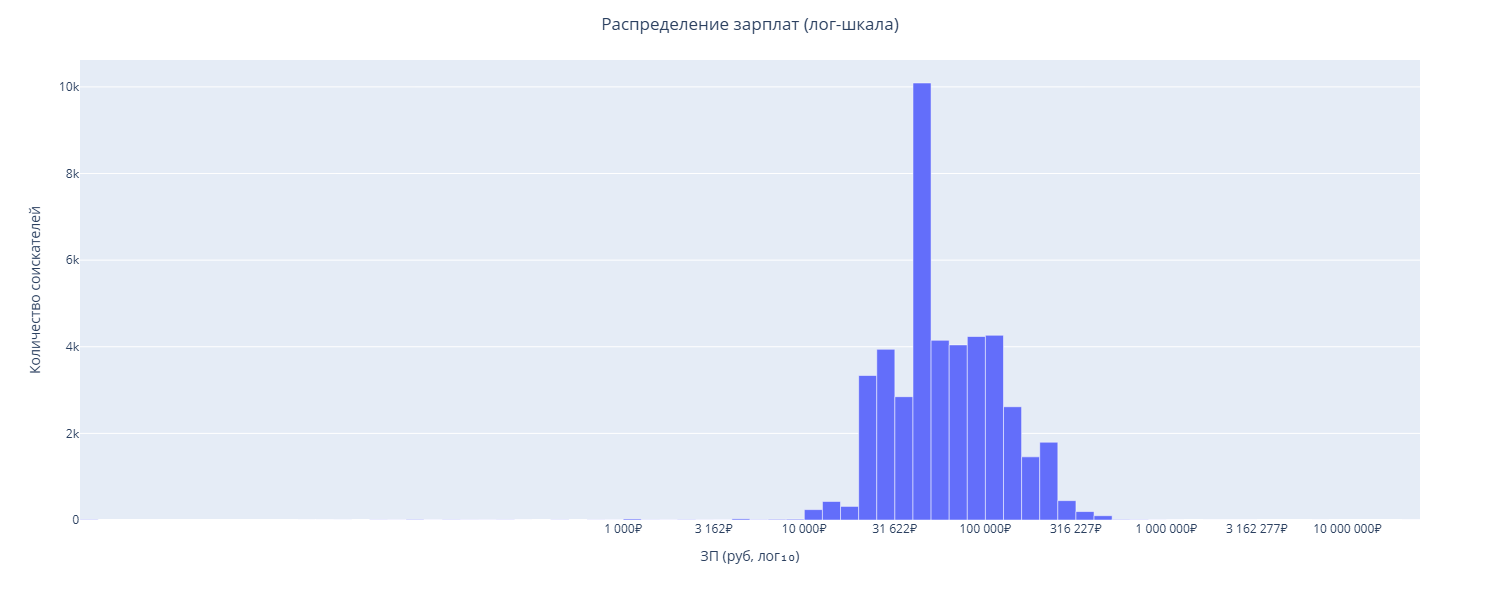

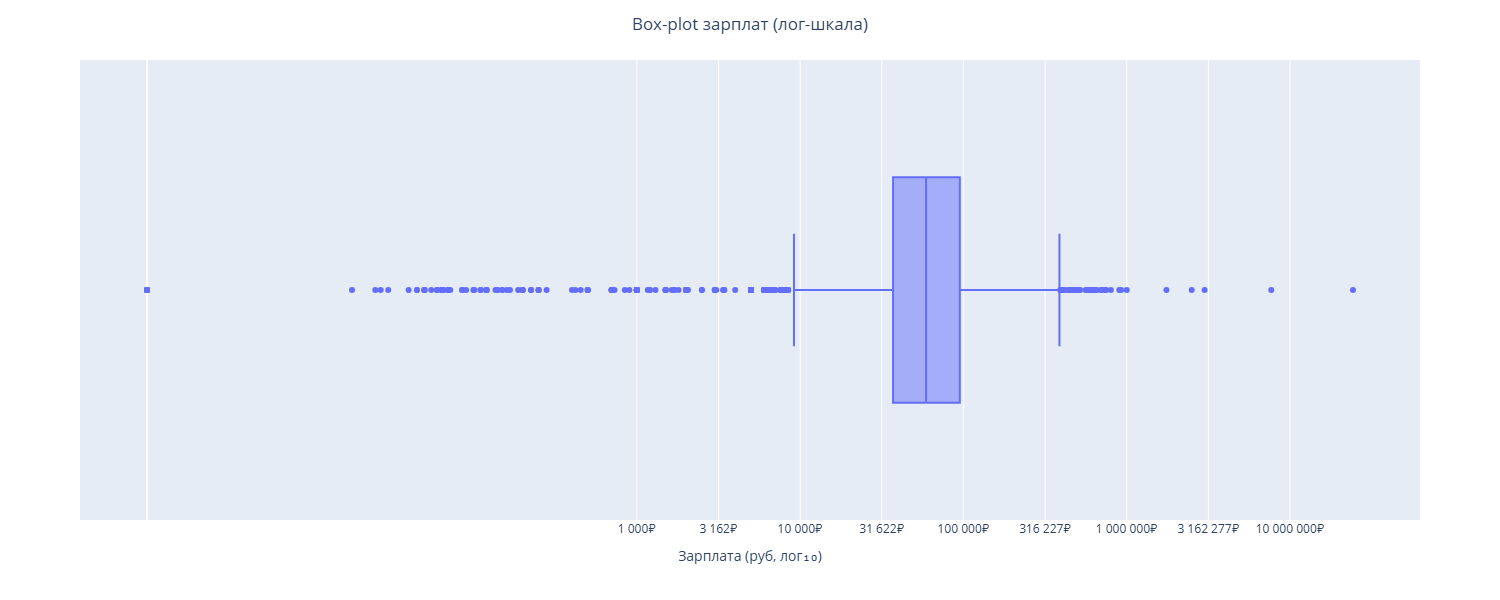

Мода: 50000.0
Минимум: 1.0
Максимум: 24304876.0
Медиана: 59019.0
25-й перцентиль: 37082.2
75-й перцентиль: 95000.0


In [16]:
# «Логарифмируем» ЗП, т.к. слишком большой разброс значений 
log_salary = np.log10(hh_data['ЗП (руб)'])          

# Подготовка делений X-оси (показывать рубли)
log_ticks = np.arange(3, 7.5, 0.5)                  # 10³ … 10⁷
tick_vals  = log_ticks
tick_text  = [f"{int(10**v):,}".replace(',', ' ') + '₽' for v in log_ticks]

# Гистограмма
fig_hist = px.histogram(
    x=log_salary,                                   
    nbins=60,
    labels={'x': 'ЗП (руб, лог₁₀)'},
)
fig_hist.update_traces(
    marker_line_width=0.5,
    marker_line_color='white',
    xbins=dict(start=log_salary.min(),
               end=log_salary.max() + 0.1,
               size=0.1)
)
fig_hist.update_layout(
    title='Распределение зарплат (лог-шкала)',
    yaxis_title='Количество соискателей',
    title_x=0.5,
    width=1500,   
    height=600,
    xaxis=dict(
        tickmode='array',
        tickvals=tick_vals,
        ticktext=tick_text
    )
)
fig_hist.write_html("docs/3_salary_hist.html")
fig_hist.show('png')

# Box-plot
fig_box = px.box(
    x=log_salary,                                  
    points='outliers',
    labels={'x': 'Зарплата (руб, лог₁₀)'},
)
fig_box.update_layout(
    title='Box-plot зарплат (лог-шкала)',
    title_x=0.5,
    width=1500,   
    height=600,
    xaxis=dict(
        tickmode='array',
        tickvals=tick_vals,
        ticktext=tick_text
    )
)
fig_box.write_html("docs/3_salary_box.html")
fig_box.show('png')

# Основные статистические данные распределения
print("Мода:", hh_data['ЗП (руб)'].mode().values[0])
print("Минимум:", hh_data['ЗП (руб)'].min())
print("Максимум:", hh_data['ЗП (руб)'].max())
print("Медиана:", hh_data['ЗП (руб)'].median())
print("25-й перцентиль:", hh_data['ЗП (руб)'].quantile(0.25))
print("75-й перцентиль:", hh_data['ЗП (руб)'].quantile(0.75))

> Вывод:
> - Мода: 50 000 руб 
>    - это наиболее частое значение
> - Предельные значения признака: от 1 до 24 304 876 руб
> - Медиана: 59 019 руб
>    - это та сумма, ниже которой находятся 50% значений
>    - медиана чуть выше моды, что намекает на слабо правостороннее смещение, т.е. у части соискателей зарплатные ожидания выше среднего, но в пределах разумного
> - Интервал большинства (Q1-Q3): от 37 082 до 95 000 руб
>    - это основная масса «вменяемых» ожиданий, именно здесь сосредоточено ядро распределения 
> - IQR (межквартильный размах): 57 918 руб
> - Выбросами по методу Тьюки считаются те, что выше и ниже границ усов:
>    - lower fence (нижний ус): 3.961868 (~9 150 руб)
>    - upper fence (верхний ус): 5.587826(~386 943 руб)
>    - в наших данных это всего 339 записей или 0,76% от общего объема, статистически можно ими пренебречь, это не исказит общую картину
>    - возможно за границей верхнего уса вакансии топ-менеджеров и с ними нужно отдельно проводить  анализ, если таковой требуется


4. Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

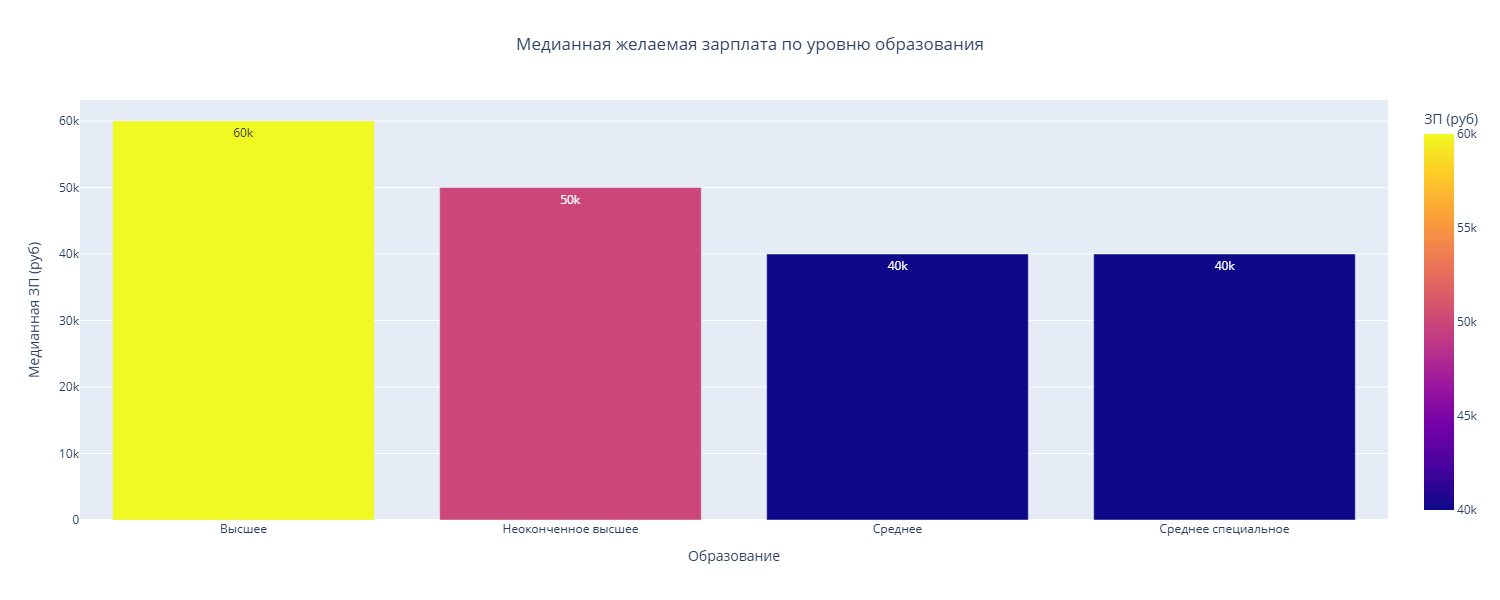

In [17]:
# Фильтруем данные: оставляем только ЗП < 1 000 000 руб
filtered_data = hh_data[hh_data['ЗП (руб)'] < 1000000]

# Группируем по образованию и считаем медианную ЗП
median_salary = filtered_data.groupby('Образование', as_index=False)['ЗП (руб)'].median()

# Строим столбчатую диаграмму
fig = px.bar(
    median_salary,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная желаемая зарплата по уровню образования',
    color='ЗП (руб)',
    text_auto=True
)

# Настраиваем отображение
fig.update_layout(
    yaxis_title='Медианная ЗП (руб)',
    title_x=0.5,
    width=1500,   
    height=600
)

fig.write_html("docs/4_salary_education_bar.html")
fig.show('png')

> Вывод:
> - Наибольший уровень медианной желаемой зарплаты (60 тыс. руб.) наблюдается у соискателей имеющих высшее образование
> - Наименьший уровень медианной желаемой зарплаты (40 тыс. руб.) наблюдается у соискателей имеющих среднее и среднее специальное образование
> - Признак уровня образования при прогнозировании заработной платы важен

5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используем для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

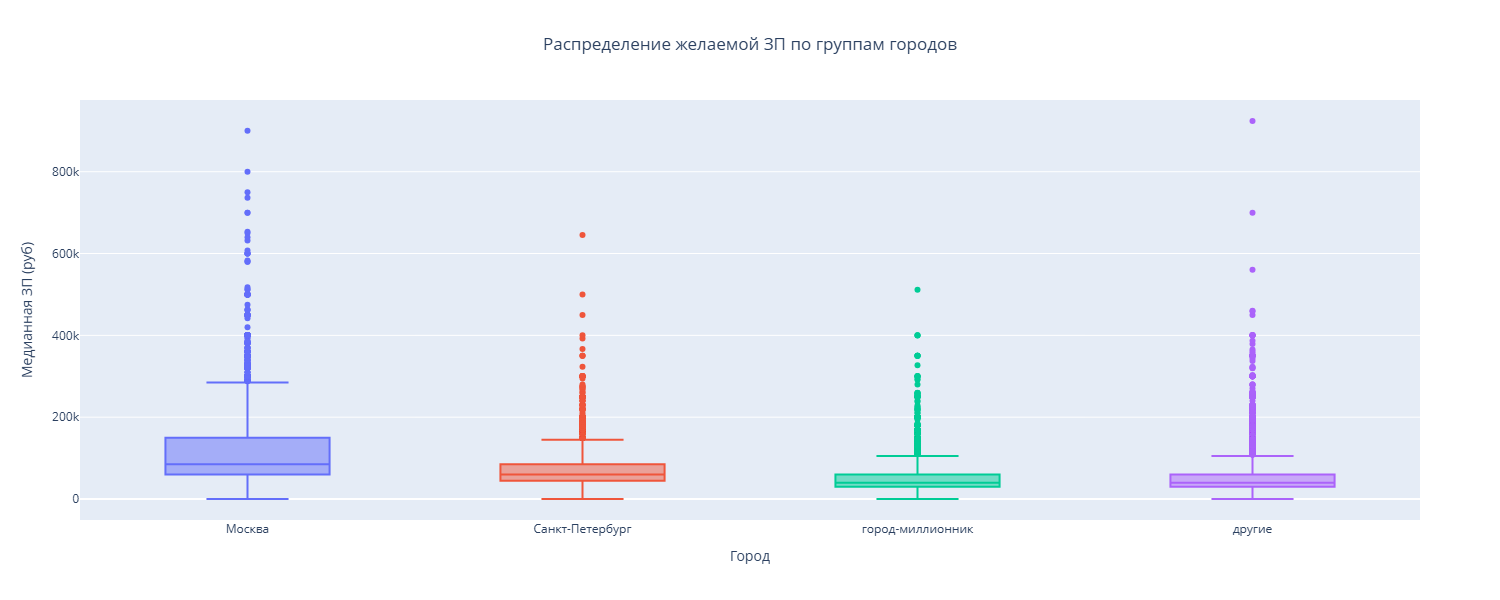

In [18]:
fig = px.box(
    filtered_data,
    x='Город',
    y='ЗП (руб)',
    category_orders={'Город': ['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие']},  # Порядок категорий
    title='Распределение желаемой ЗП по группам городов',
    color='Город',
)
fig.update_layout(
    showlegend=False,
    hovermode='x unified',
    yaxis_title='Медианная ЗП (руб)',
    title_x=0.5,
    width=1500,   
    height=600
)

fig.write_html("docs/5_salary_city_box.html")
fig.show('png')

> Вывод:
> - Наибольший уровень медианной желаемой зарплаты (85 тыс. руб.) наблюдается у соискателей из Москвы
> - Наименьший уровень медианной желаемой зарплаты (40 тыс. руб.) наблюдается у соискателей городов-миллионников и более мелких городов
> - Признак города при прогнозировании заработной платы важен

6. Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируем график, сравнив уровень заработной платы в категориях.

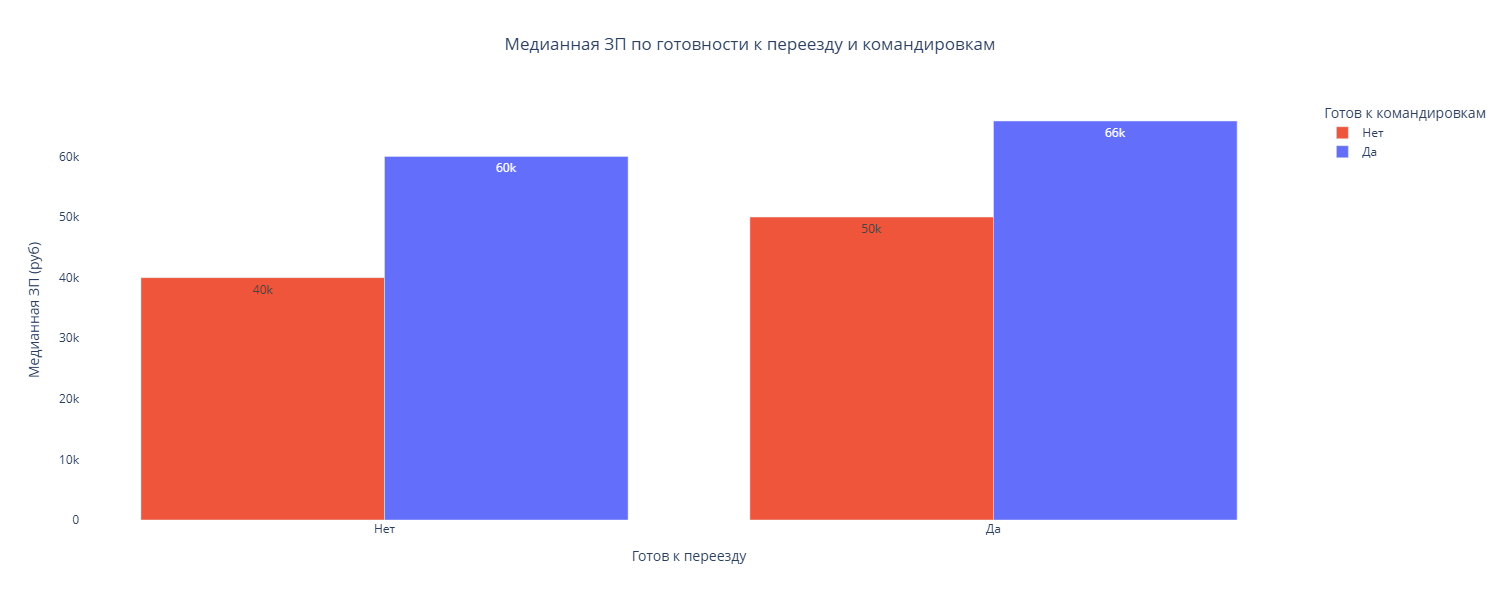

In [19]:
# Группировка по двум бинарным признакам и расчет медианной ЗП
median_salaries = hh_data.groupby(
    ['Готовность к переезду', 'Готовность к командировкам'], 
    as_index=False
)['ЗП (руб)'].median()

# Преобразуем True/False в строки для удобства подписей
median_salaries['Готовность к переезду'] = median_salaries['Готовность к переезду'].map({True: 'Да', False: 'Нет'})
median_salaries['Готовность к командировкам'] = median_salaries['Готовность к командировкам'].map({True: 'Да', False: 'Нет'})

fig = px.bar(
    median_salaries,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    barmode='group',  # Группировка столбцов
    title='Медианная ЗП по готовности к переезду и командировкам',
    labels={'ЗП (руб)': 'Медианная ЗП (руб)', 'Готовность к переезду': 'Готов к переезду'},
    text_auto='.2s',  # Автоформатирование подписей (например, "100K")
    category_orders={  # Порядок категорий
        'Готовность к переезду': ['Нет', 'Да'],
        'Готовность к командировкам': ['Нет', 'Да']
    },
    color_discrete_sequence=['#EF553B', '#636EFA']  # Цвета для "Нет" и "Да"
)

# Настройка отображения
fig.update_layout(
    xaxis_tickangle=0,
    legend_title='Готов к командировкам',
    hovermode='x unified',
    plot_bgcolor='white',
    title_x=0.5,
    width=1500,   
    height=600
)

fig.write_html("docs/6_salary_trip_relocation_bar.html")
fig.show('png')

> Вывод:
> - Соискатели, готовые к переезду и командировкам, запрашивают самую высокую медианную ЗП — 66 000 руб
>    - это логично, такая готовность требует личных вложений, стресса и затрат времени, и соискатели это включают в свои зарплатные ожидания
> - Минимальную ЗП ожидают те, кто не готов ни к командировкам, ни к переезду — 40 000 руб
>  - это может указывать либо на более низкую амбициозность, либо на ограниченные профессиональные возможности в рамках своей локации и формата работы
> - Те, кто готов к командировкам, но не к переезду ожидают 60 000 руб
> - Те, кто готов к переезду, но не к командировкам — только 50 000 руб
> 
> - Чем больше условий человек готов принять, тем выше он оценивает свою стоимость на рынке
> - Готовность к командировкам ценится больше, чем готовность к переезду, что может быть вызвано тем, что командируемые люди, как правило, занимают более высокие должности.


7. Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**. Проанализируем тепловую карту, сравнив показатели внутри групп.

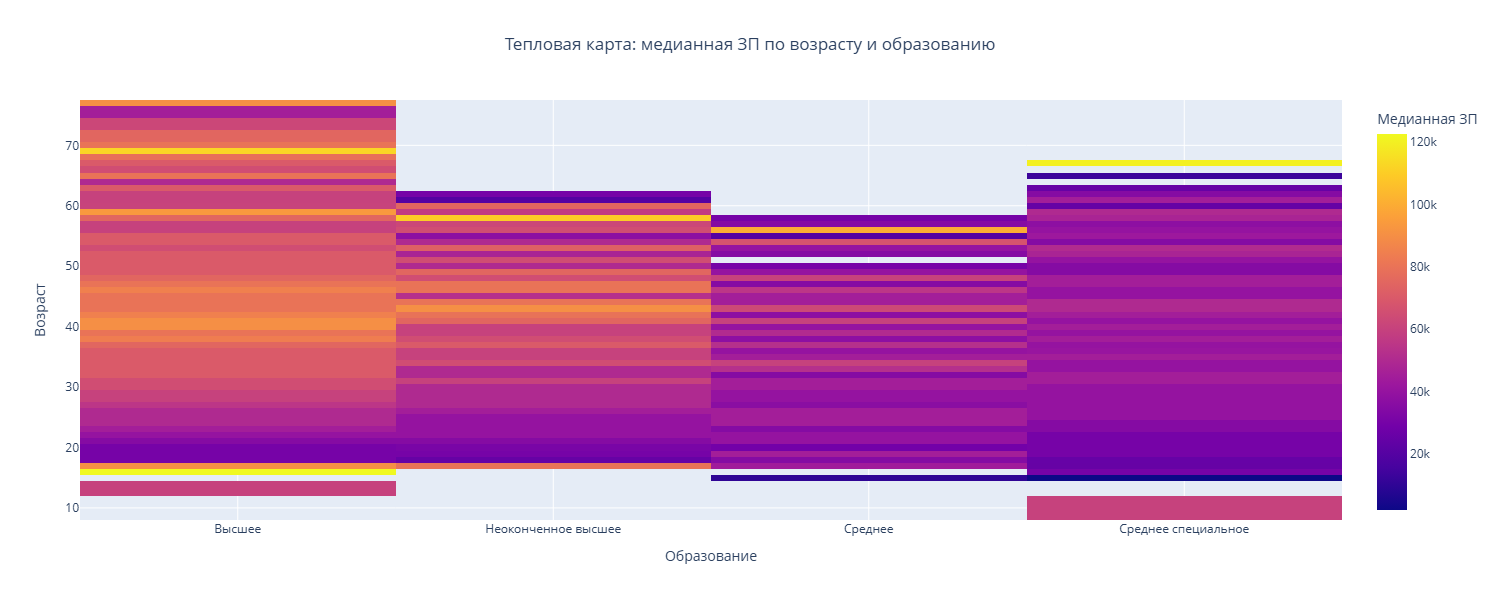

In [20]:
# Группировка и медиана
grouped = hh_data.groupby(['Возраст', 'Образование'], observed=True)['ЗП (руб)'].median().reset_index()
grouped.rename(columns={'ЗП (руб)': 'Медианная ЗП'}, inplace=True)

# Создаём сводную таблицу
pivot_table = grouped.pivot(index='Возраст', columns='Образование', values='Медианная ЗП')

# Создаем тепловую карту
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorbar=dict(title='Медианная ЗП')
))

# Визуальное оформление
fig.update_layout(
    title='Тепловая карта: медианная ЗП по возрасту и образованию',
    title_x=0.5,
    xaxis_title='Образование',
    yaxis_title='Возраст',
    width=1500,   
    height=600
)

fig.write_html("docs/7_age_education_heatmap.html")
fig.show('png')

> Выводы:
> - Медианная желаемая зарплата растёт с повышением уровня образования:
>    - «Высшее» — самый высокий уровень
>    - «Неоконченное высшее» — чуть ниже
>    - «Среднее специальное» и «Среднее» — значительно ниже
> - Возраст положительно коррелирует с желаемой зарплатой: с ростом возраста медианная желаемая зарплата увеличивается
> - Максимальные значения медианной ЗП наблюдаются у людей среднего возраста с высшим образованием
> - Для младших возрастных групп и более низких уровней образования медианная ЗП заметно ниже
> 
> В целом данные подтверждают логичную зависимость зарплатных ожиданий от опыта (возраста) и квалификации (образования)

8. Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

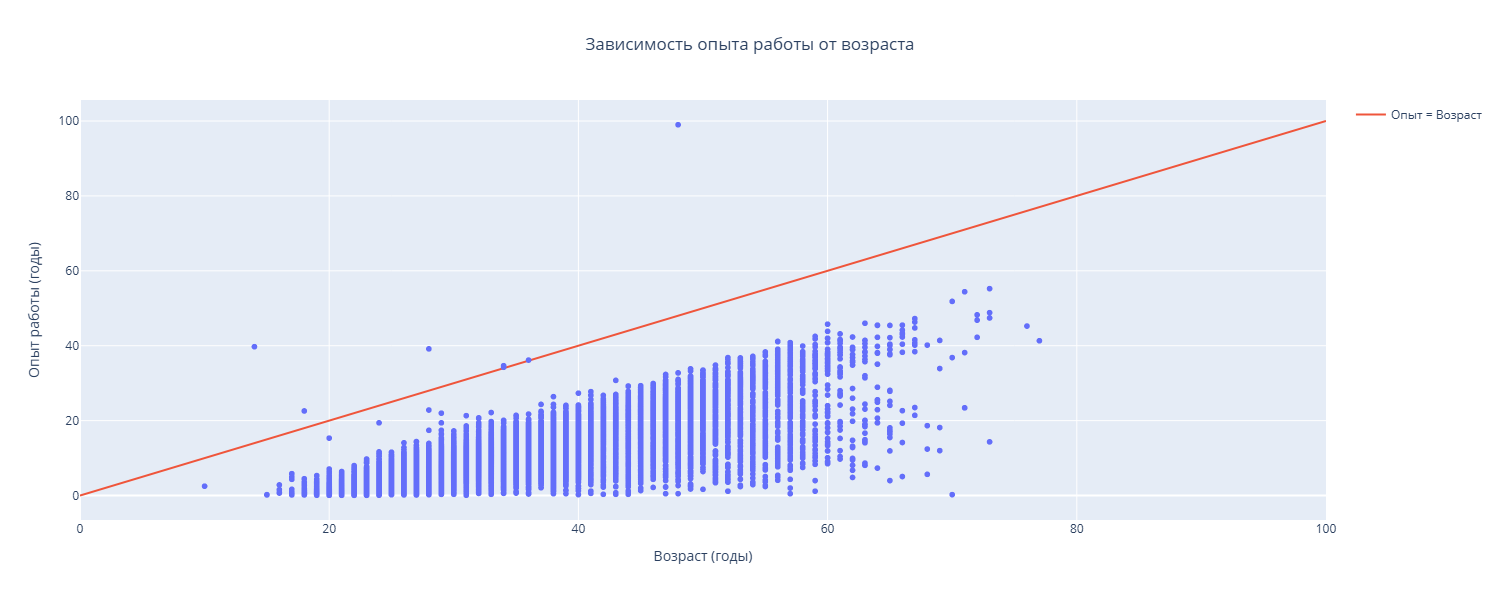

In [21]:
# Диаграмма рассеяния
fig = px.scatter(
    hh_data,
    x='Возраст',
    y=hh_data['Опыт работы (месяц)'] / 12,
    title='Зависимость опыта работы от возраста'
)

# Добавляем линию y = x (опыт = возраст)
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode='lines',
        name='Опыт = Возраст'
    )
)

# Обновляем макет
fig.update_layout(
    title_x=0.5,
    xaxis_title='Возраст (годы)',
    yaxis_title='Опыт работы (годы)',
    width=1500,   
    height=600
)

fig.write_html("docs/8_experience_age_scatter.html")
fig.show('png')

> Выводы:
> - Чем старше соискатель, тем больше стаж
> - Большинство точек лежат ниже красной линии, это говорит, что данные в целом согласуются с реальностью
> - Все что выше или лежит на красной линии аномалия
> - Самостоятельно работать можно с 15 лет, значит разница между Возрастом и Стажем не должна быть меньше этого значения. Это тоже можно считать аномалией.

9. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от признака (**"Пол"**).


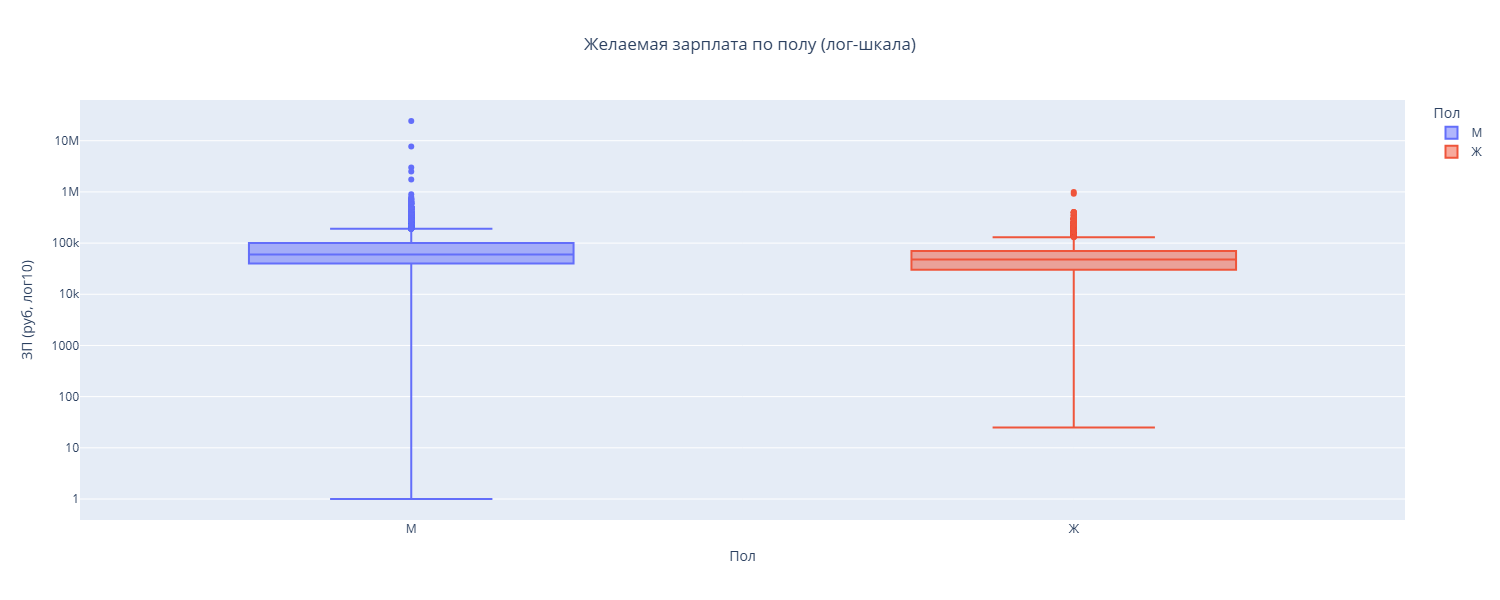

In [22]:
# Строим Boxplot желаемая ЗП по Полу
fig = px.box(
    hh_data, 
    x='Пол', 
    y='ЗП (руб)', 
    color='Пол',
    title='Желаемая зарплата по полу (лог-шкала)'
)

fig.update_yaxes(type='log')        # логарифмическая шкала log10
fig.update_layout(
    title_x=0.5, 
    yaxis_title='ЗП (руб, лог10)',
    width=1500,   
    height=600
)

fig.write_html("docs/9_salary_sex_box.html")
fig.show('png')

> Выводы:
> - Медиана: Мужчины 60к, Женщины 48к
>    - 	Мужчины запрашивают на ~25 % больше
> - 1-й квартиль (Q1): Мужчины 40к, Женщины 30к
>    - нижний уровень ожиданий у Мужчин выше
> - 3-й квартиль (Q3): Мужчины 100к, Женщины 70к
>    - верхняя «нормальная» граница у Мужчин выше на 30к
> - IQR (Q3-Q1):	Мужчины 60k, Женщины 40k
>    - у Мужчин разброс шире, более разнообразные запросы
> - Выбросы сверху: Мужчины до 24М, Женщины до 1М
>    - экстремально высокие ожидания встречаются почти только у Мужчин
> 
> Мужчины декларируют более высокие зарплатные ожидания и демонстрируют больший разброс, тогда как Женские запросы концентрированы в более узком и низком диапазоне.

10. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от желаемой должности из признака (**"Ищет работу на должность:"**). Рассмотрим только соискателей с ЗП до 1 млн. руб. и возьмем только ТОП-15 самых часто встречающихся должностей.

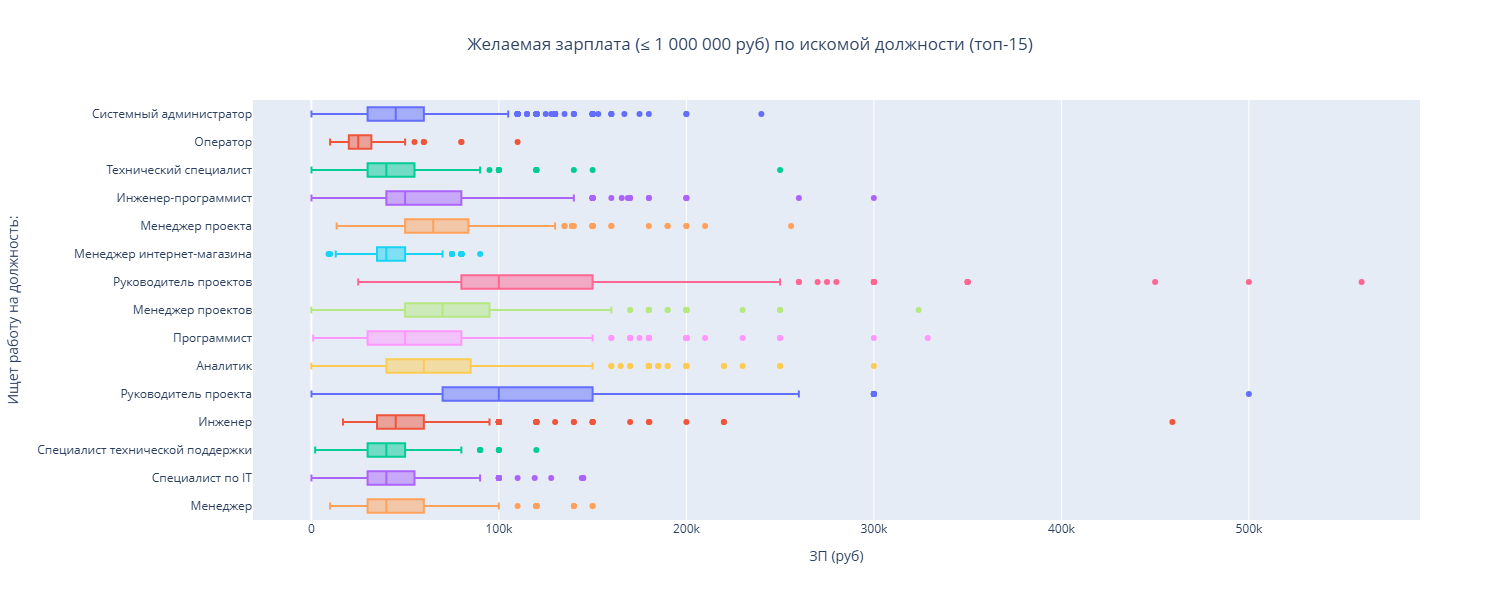

In [23]:
# Топ-15 должностей для ЗП < 1 млн. руб. (filtered_data)
top_n = 15
top_titles = (
    filtered_data['Ищет работу на должность:']
    .value_counts()
    .nlargest(top_n)
    .index
)
df_top = filtered_data[filtered_data['Ищет работу на должность:'].isin(top_titles)].copy()

# boxplot
fig = px.box(
    df_top,
    y='Ищет работу на должность:',
    x='ЗП (руб)',
    color='Ищет работу на должность:',
    title='Желаемая зарплата (≤ 1 000 000 руб) по искомой должности (топ-15)',
    height=600
)

fig.update_layout(
    showlegend=False, 
    title_x=0.5,
    width=1500,   
    height=600
)

fig.write_html("docs/10_salary_position_box.html")
fig.show('png')

> Выводы:
> - Наиболее «дорогие» должности: Самые высокие медианы у «Руководитель проекта/проектов». Их медианная планка находится на 100к
> - Средний ценовой сегмент:	«Менеджер проектов/проекта», «Аналитик», «Программист/инженер-программист»  – медианы 50–70к
> - Самые «доступные» запросы: «Системный администратор», «Специалист техподдержки», «Оператор», «Инженер», «Менеджер» и прочие – медианы 25–45к
> 
> Итого:
>    - Руководящие позиции требуют существенно более высокой зарплаты
>   - Техническая поддержка и операторские роли — нижний диапазон
> Разброс ожиданий растёт вместе с уровнем должности: чем «сложнее» роль, тем шире вилка запрашиваемых сумм

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдем **полные дубликаты** в таблице с резюме и удалим их. 

In [24]:
# Посмотрим, сколько строк являются полными дубликатами
dup_mask = hh_data.duplicated()
n_dups = dup_mask.sum()
print(f'Полных дубликатов: {n_dups}')
print(f'Строк до очистки: {hh_data.shape[0]}')

# Удалим полные дубликаты, оставив первую встреченную запись
hh_data = hh_data.drop_duplicates(keep='first').reset_index(drop=True)
print(f'Строк после очистки: {len(hh_data)}')

Полных дубликатов: 161
Строк до очистки: 44744
Строк после очистки: 44583


2. Займемся пропусками. Выводим информацию **о числе пропусков** в столбцах. 

In [25]:
missing_counts = hh_data.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Чему равно результирующее среднее значение в столбце **«Опыт работы (месяц)»** после заполнения пропусков? Ответ округлите до целых.

In [46]:
# Удаляем строки
hh_data_clean = hh_data.dropna(
    subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']
).copy()

# Заполняем пропуски медианой по оставшейся выборке
median_exp = hh_data_clean['Опыт работы (месяц)'].median()
hh_data_clean['Опыт работы (месяц)'] = (
    hh_data_clean['Опыт работы (месяц)'].fillna(median_exp)
)

# Контроль: проверяем, что пропусков больше нет
print(round(hh_data_clean['Опыт работы (месяц)'].mean()))


114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [48]:
# удаляем зарплаты < 1 000 руб и > 1 000 000 руб
mask = (hh_data_clean['ЗП (руб)'] > 1000) | (hh_data_clean['ЗП (руб)'] < 1000000)
hh_data_clean = hh_data_clean.loc[mask].reset_index(drop=True)

print('Строк осталось:', len(hh_data_clean))

Строк осталось: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдем такие резюме и удалим их из данных


In [27]:
# Маска «опыт (в годах) > возраст»
mask = (hh_data_clean['Опыт работы (месяц)'] / 12) > hh_data_clean['Возраст']

# Сколько резюме аномальны
print('Аномальных строк:', mask.sum())

# Удаляем эти резюме и переиндексируем
hh_data_clean = hh_data_clean.loc[~mask].reset_index(drop=True)

print('Строк осталось:', len(hh_data_clean))

Аномальных строк: 7
Строк осталось: 44574


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного или слишком молодого возраста для поиска работы. Построим распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Определим в какую сторону асимметрично логарифмическое распределение. Найдем выбросы с помощью метода z-отклонения и удалим их из данных. Сделаем послабление на **1 сигму** (возьмем 4 сигмы) в **правую сторону**.

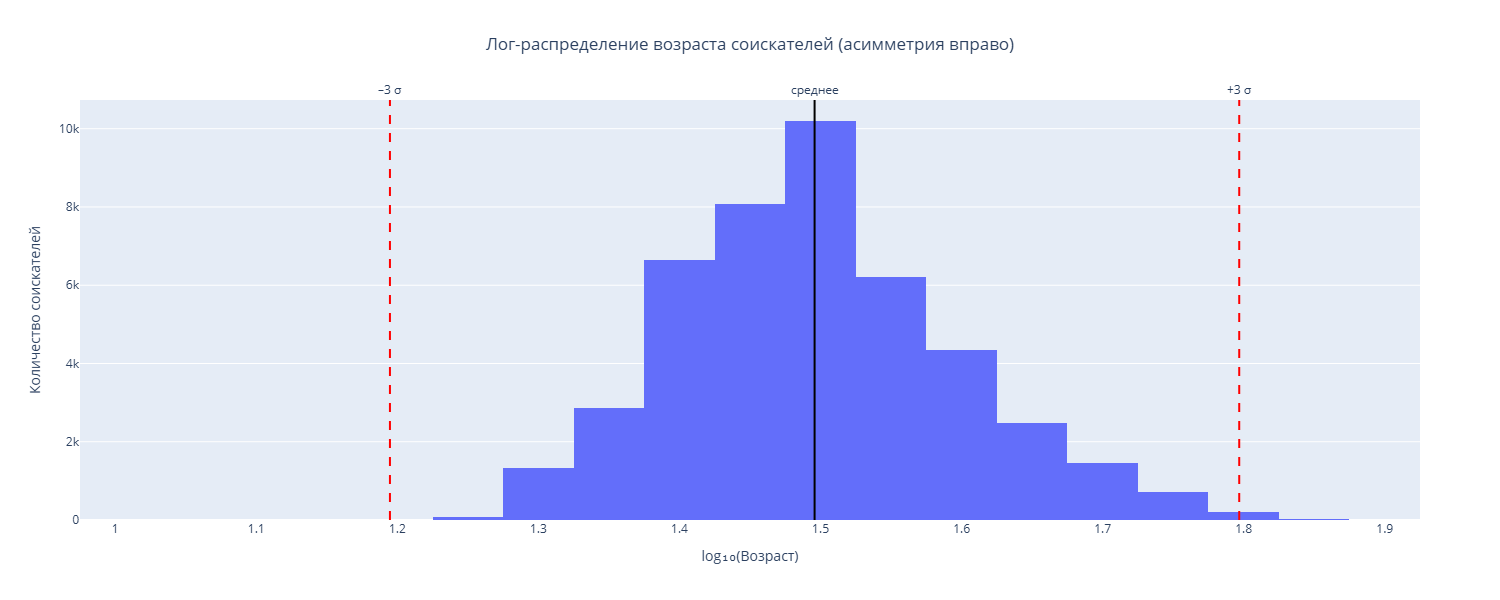

Асимметрия логарифмического распределения: 0.45 (хвост вправо)
Найдено выбросов: 3


,Возраст
30975,15
32788,15
33492,10


In [28]:
# Данные Возраст
age = hh_data_clean['Возраст']

# Логарифмируем Возраст
log_age = np.log10(age)

# Параметры распределения
mu, std = log_age.mean(), log_age.std()

# Гистограмма
fig = px.histogram(
    x=log_age,
    nbins=30,
    title='Лог-распределение возраста соискателей (асимметрия вправо)'
)

# Линии среднего и ±3σ
for x_val, name, col in [
    (mu,           'среднее',      'black'),
    (mu - 3*std,   '–3 σ',         'red'),
    (mu + 3*std,   '+3 σ',         'red')
]:
    fig.add_vline(
        x=x_val,
        line=dict(color=col, width=2, dash='dash' if 'σ' in name else 'solid'),
        annotation_text=name,
        annotation_position='top'
    )

fig.update_layout(
    title_x=0.5,
    xaxis_title='log₁₀(Возраст)',
    yaxis_title='Количество соискателей',
    width=1500,   
    height=600   
)

fig.write_html("docs/11_age_z_score_hist.html")
fig.show('png')

# Определяем асимметрию
skew_val = log_age.skew()
print(f"Асимметрия логарифмического распределения: {skew_val:.2f} "
      f"(хвост {'вправо' if skew_val>0 else 'влево'})")


# Выбросы
lower = mu - 3 * std         # граница слева 3σ                                 
upper = mu + 4 * std         # граница справа 4σ
outliers_mask = (log_age < lower) | (log_age > upper)
outliers_tbl = hh_data_clean.loc[outliers_mask, ['Возраст']]
print(f'Найдено выбросов: {len(outliers_tbl)}')
display(outliers_tbl)

# Удаляем выбросы
hh_data_clean = hh_data_clean.loc[~outliers_mask].reset_index(drop=True)

# Комментарии
1. распределение имеет правостороннюю асимметрию
2. в данных обнаружены три резюме с очень низким указанным возрастом — 10 и 15 лет, что выбивается из общей выборки